## Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import .pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 2: Reading and understanding data

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Delete instant,dteday,casual and registerd columns
data.drop(columns=["instant","dteday","casual","registered"],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Note: For visulisation purpose giving label to catagorical varibles

In [8]:
data.season = data.season.apply(lambda x: ["spring","summer","fall","winter"][x-1])

In [9]:
# here we are creating new "year" column just to visualisation purpose we will delete it later.
data["year"] = data.yr.apply(lambda x:["2018","2019"][x])

In [10]:
import datetime

data.mnth = data.mnth.apply(lambda x: datetime.datetime.strptime(str(x), "%m").strftime("%b"))

In [11]:
data.weekday = data.weekday.apply(lambda x:["Sun","Mon","Tue","Wed","Thu","Fri","Sat"][x])

In [12]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985,2018
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801,2018
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  year        730 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


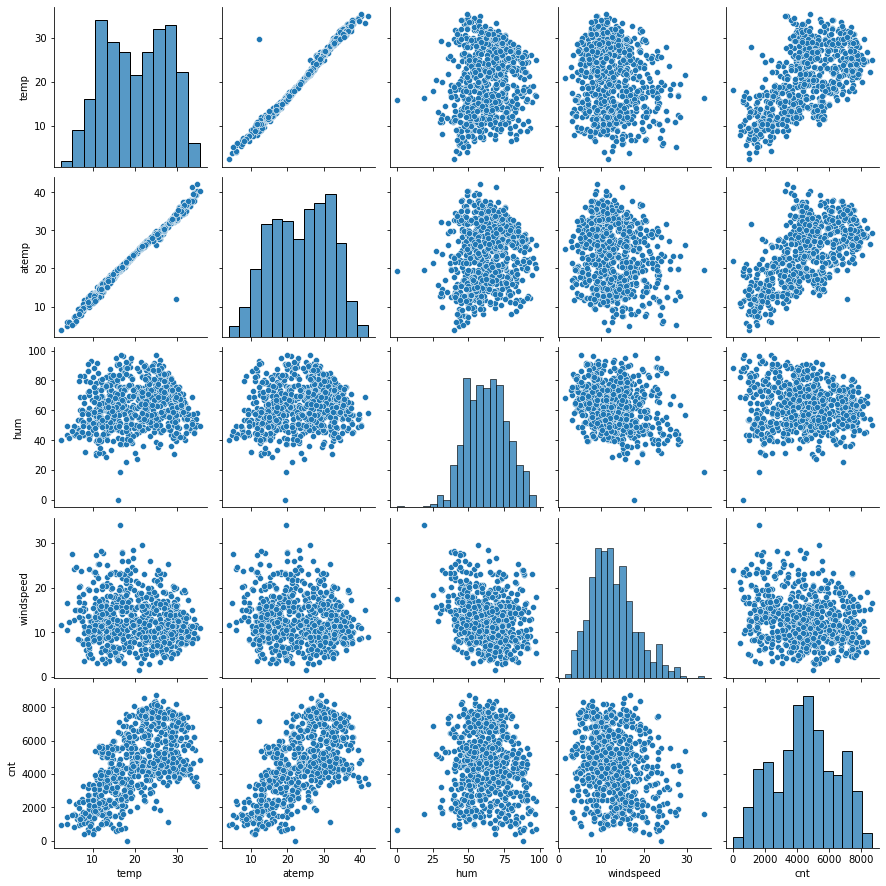

In [14]:
# visualise data with all continuse data
sns.pairplot(data[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

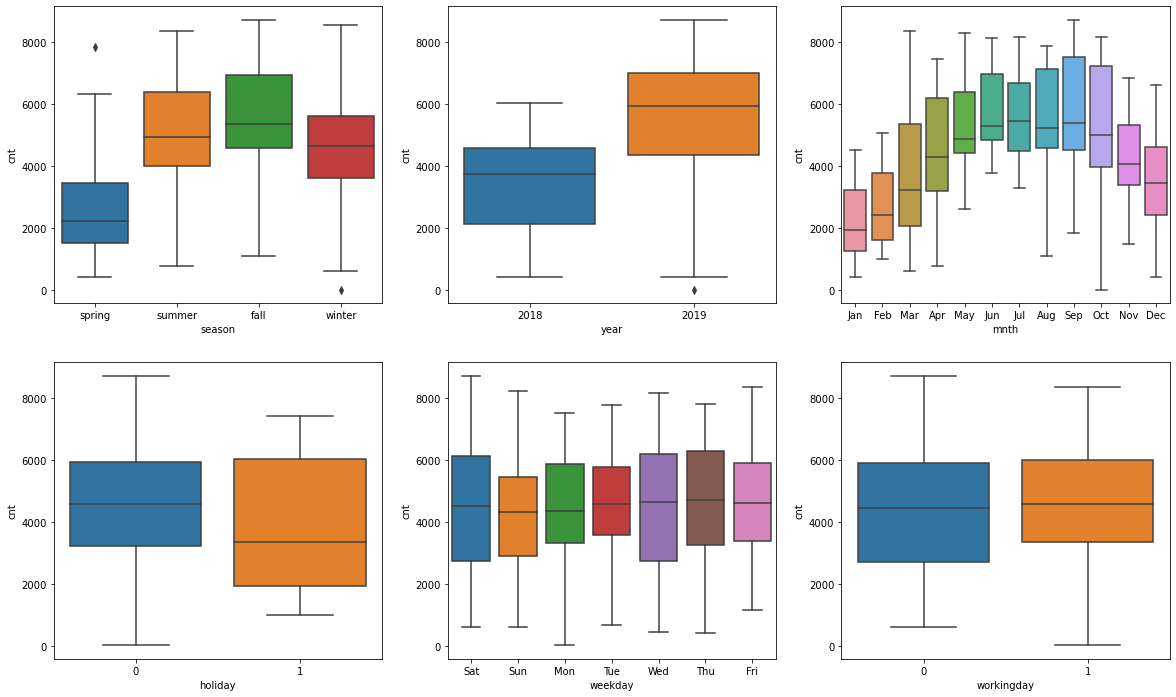

In [15]:
# visualising categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data=data)
plt.subplot(2,3,2)
sns.boxplot(x="year",y="cnt",data=data)
plt.subplot(2,3,3)
sns.boxplot(x="mnth",y="cnt",data=data)
plt.subplot(2,3,4)
sns.boxplot(x="holiday",y="cnt",data=data)
plt.subplot(2,3,5)
sns.boxplot(x="weekday",y="cnt",data=data)
plt.subplot(2,3,6)
sns.boxplot(x="workingday",y="cnt",data=data)
plt.show()

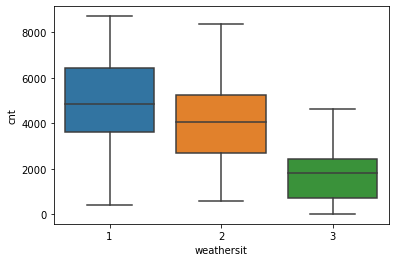

In [16]:
sns.boxplot(x="weathersit",y="cnt",data=data)
plt.show()

## Step 3: Preparing data for modeling

### 1. creating dummy variables

In [17]:
temp = pd.get_dummies(data.season, drop_first=True)
temp.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
data = pd.concat([data,temp], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,spring,summer,winter
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1,0,0
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1,0,0
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,0,0
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1,0,0
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1,0,0


In [19]:
temp = pd.get_dummies(data.mnth, drop_first=True)
temp.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
data = pd.concat([data,temp], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [21]:
temp = pd.get_dummies(data.weekday, drop_first=True)
temp.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [22]:
data = pd.concat([data,temp], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# lets remove year,mnth,season,weekday

data.drop(columns=["season","mnth","year","weekday"], inplace=True)

In [24]:
# converting weathersit to string so that we can create dummy variables

data.weathersit = data.weathersit.apply(lambda x: str(x))

In [25]:
temp = pd.get_dummies(data.weathersit, prefix="weather", drop_first=True,)
temp.head()

,weather_2,weather_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [26]:
data = pd.concat([data,temp], axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather_2,weather_3
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# drop weathersit column

data.drop(columns=["weathersit"],inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

### 2. spliting data into train and test

In [29]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [30]:
data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather_2,weather_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. rescaling variables ( using min-max method )

In [31]:
# init obj
scaler = MinMaxScaler()

# 1 create a list of continuouse variables column names and store in num_var
num_var = ["temp","atemp","hum","windspeed","cnt"]

# 2 fit on data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather_2,weather_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Training the model

<AxesSubplot:>

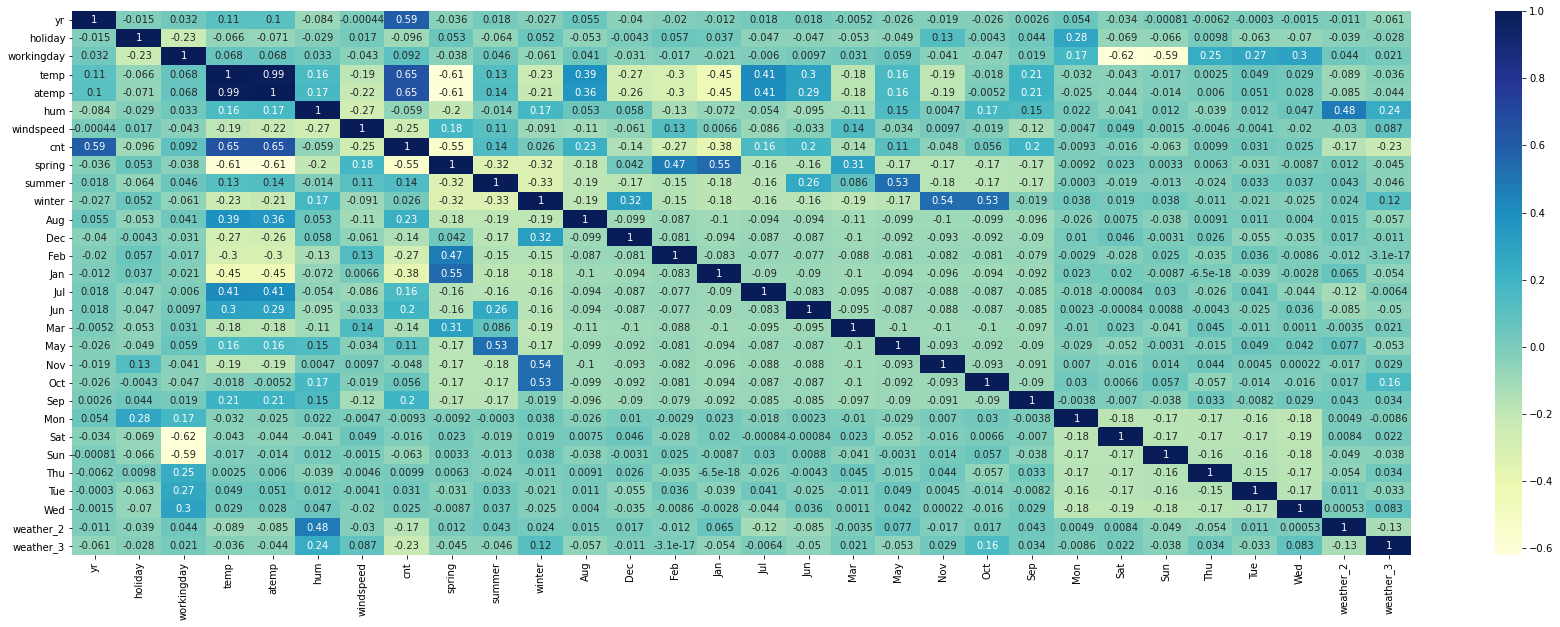

In [32]:
# Using heatmap checking correlation between all variables.
plt.figure(figsize=(30,10))
sns.heatmap(data=df_train.corr(), annot=True, cmap="YlGnBu")

### 1. spliting into y_train and x_train

In [33]:
y_train = df_train.pop("cnt")
x_train = df_train
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 2. Using RFE getting top 15 variables that are best for model bulding.

In [34]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(x_train,y_train)

In [35]:
# Top 15 selected variables
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Sat', 'Sun', 'weather_2',
       'weather_3'],
      dtype='object')

In [36]:
# rejected variable
x_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### 3. Model Building

In [37]:
# function which create and fit model return fitted model.

def model_fit(data):
    # adding constant
    x_train_sm = sm.add_constant(data)
    
    # create model
    lr = sm.OLS(y_train,x_train_sm)
    
    # fit
    lr_model = lr.fit()
    
    # returning model
    return lr_model

In [38]:
# creating function to display VIF

def display_vif(data):
    vif = pd.DataFrame()
    vif["Features"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [39]:
# making 1st model with all selected columns 

temp = x_train[col]
lr_model = model_fit(temp)
print(lr_model.summary())
print(display_vif(temp))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.11e-191
Time:                        23:00:23   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [40]:
# drop column = "holiday" and rebuilding model

temp = x_train[col].drop(columns="holiday")
lr_model = model_fit(temp)
print(lr_model.summary())
print(display_vif(temp))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.11e-191
Time:                        23:00:23   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.0

In [41]:
# drop column = "Sun" and rebuilding model

temp = x_train[col].drop(columns=["holiday","Sun"])
lr_model = model_fit(temp)
print(lr_model.summary())
print(display_vif(temp))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.54e-191
Time:                        23:00:23   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.0

In [42]:
# drop column = "hum" and rebuilding model

temp = x_train[col].drop(columns=["holiday","Sun","hum"])
lr_model = model_fit(temp)
print(lr_model.summary())
print(display_vif(temp))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          7.12e-189
Time:                        23:00:23   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

## Step 5:  Residual Analysis

In [43]:
# prediction on x_train
x_train_data = sm.add_constant(temp)
y_train_pred = lr_model.predict(x_train_data)

In [44]:
y_train_pred.head()

576    0.750449
426    0.480806
728    0.337872
482    0.582337
111    0.283197
dtype: float64

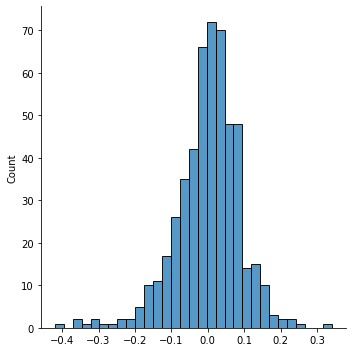

In [45]:
res = y_train - y_train_pred
sns.displot(res)

## Step 6: Model Prediction

In [46]:
# transform on data to test
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather_2,weather_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# spliting into y_train and x_train
y_test = df_test.pop("cnt")
x_test = df_test
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weather_2,weather_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
# "col" varibles holds all top 15 variable which we select automatically
x_test_sm = sm.add_constant(x_test[col])
x_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jul,Sep,Sat,Sun,weather_2,weather_3
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0


In [49]:
x_test_sm = x_test_sm.drop(columns=["holiday","Sun","hum"])
x_test_sm.head()

,const,yr,workingday,temp,windspeed,spring,summer,winter,Jul,Sep,Sat,weather_2,weather_3
184,1.0,0,0,0.831783,0.084219,0,0,0,1,0,0,1,0
535,1.0,1,1,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,0,1,0,0,0,1,0
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,0,1,0,0,0,0,0,0


In [50]:
# prediction on test data
y_test_pred = lr_model.predict(x_test_sm)
y_test_pred.head()

184    0.415597
535    0.906131
299    0.407696
221    0.586599
152    0.573323
dtype: float64

## Step 7: Model evaluation on the test set

In [51]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.808306664630454

In [52]:
# r2 score on training data
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8398780502841431